# 3D simulator

## Helper functions

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def simulate(func, x0=0.0, y0=0.0, z0=0.0, n_steps=10000, dt=0.01):
    xs, ys, zs = [], [], []
    x, y, z = x0, y0, z0
    for _ in range(n_steps):
        xs.append(x)
        ys.append(y)
        zs.append(z)
        x_dot, y_dot, z_dot = func(x, y, z)
        x += dt*x_dot 
        y += dt*y_dot 
        z += dt*z_dot         
    return np.array(list(zip(xs, ys, zs)))

def plot_distance(out1, out2):
    diff = out1 - out2
    ax = plt.axes(projection='3d')
    ax.plot3D(diff[:,0], diff[:,1], diff[:,2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z');
    plt.title('Euclidean distance per dimension')
    plt.show()

    plt.title('Euclidean distance')
    dist = np.linalg.norm(out1-out2, axis=1)
    plt.plot(dist)
    plt.show()

## Lorenz attractor

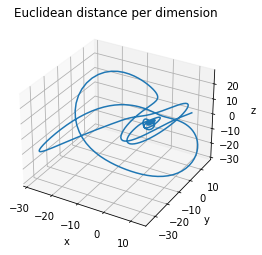

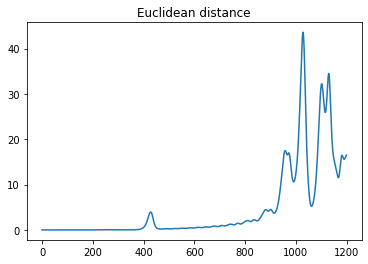

In [15]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

n_steps = 1200
out1 = simulate(lorenz, x0=1.001, y0=3.001, z0=4.001, n_steps=n_steps)
out2 = simulate(lorenz, x0=1.002, y0=3.002, z0=4.002, n_steps=n_steps)
plot_distance(out1, out2)

## Another function

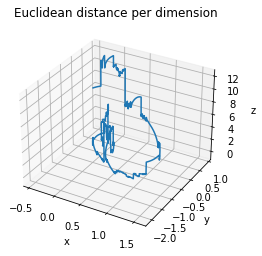

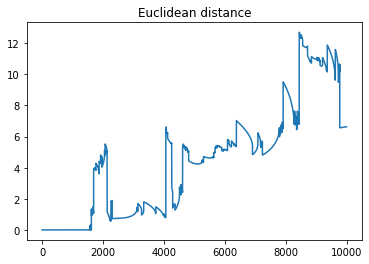

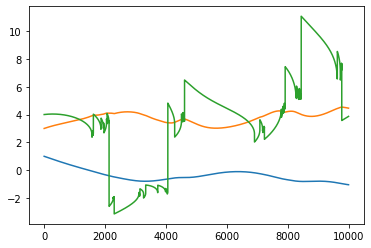

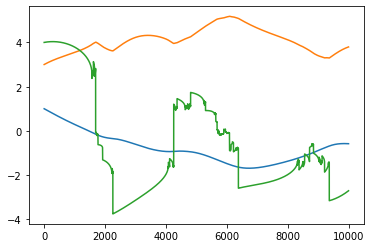

In [29]:
def another(x, y, z):
    """
    Given:
       x, y, z: a point of interest in three dimensional space
       s, r, b: parameters defining the lorenz attractor
    Returns:
       x_dot, y_dot, z_dot: values of the lorenz attractor's partial
           derivatives at the point x, y, z
    """
    x_dot = np.sin(x + y)
    y_dot = np.cos(x * y / x + z)
    z_dot = np.tan(x-y / z)
    return x_dot, y_dot, z_dot

n_steps = 10000
out1 = simulate(another, x0=1.001, y0=3.001, z0=4.001, n_steps=n_steps, dt=0.001)
out2 = simulate(another, x0=1.002, y0=3.002, z0=4.002, n_steps=n_steps, dt=0.001)
plot_distance(out1, out2)
plt.plot(out1)
plt.show()
plt.plot(out2)
plt.show()